In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_usa = pd.read_csv('preprocessed/usa.csv', parse_dates=['date'])

In [4]:
df_usa.shape

(16708, 6)

In [5]:
df_usa.head()

,index,id,date,url,title,contents
0,1,8811,2001-01-21,http://2001-2009.state.gov/r/pa/prs/ps/2001/8.htm,ship coordinate committee,meet the ship coordinate committee internation...
1,2,8809,2001-01-22,http://2001-2009.state.gov/r/pa/prs/ps/2001/46...,duty the secretary state,office the press secretary washington january ...
2,3,8810,2001-01-22,http://2001-2009.state.gov/r/pa/prs/ps/2001/9.htm,inauguration president arroyo,inauguration president arroyo revise january g...
3,4,8807,2001-01-24,http://2001-2009.state.gov/r/pa/prs/ps/2001/18...,conviction feliks kulov,january conviction kyrgyz opposition figure fe...
4,5,8808,2001-01-24,http://2001-2009.state.gov/r/pa/prs/ps/2001/16...,japanese foreign minister kono,january visit japanese foreign minister kono j...


In [14]:
df_usa.month = 12*(df_usa.date.dt.year-2001)+df_usa.date.dt.month

(array([  64.,   55.,  130.,   63.,   71.,   36.,  130.,   46.,  118.,
          52.,  110.,   69.,  124.,   58.,  144.,   61.,   71.,  151.,
          61.,  143.,   62.,  115.,   68.,  126.,   61.,  153.,   67.,
         149.,   71.,  122.,   73.,  141.,   71.,  143.,  273.,  123.,
         233.,   79.,  252.,  128.,  248.,  117.,  256.,  152.,  196.,
          74.,  236.,  113.,  157.,   95.,  115.,  216.,  121.,  215.,
         111.,  290.,  113.,  187.,  118.,  239.,  128.,  185.,  156.,
         195.,  126.,  202.,  140.,  143.,  250.,  154.,  252.,  144.,
         250.,    0.,  251.,  144.,  309.,  177.,  313.,  178.,  325.,
         159.,  374.,  152.,  201.,  449.,  133.,  479.,  204.,  351.,
         182.,  368.,  218.,  457.,  162.,  400.,  187.,  244.,  134.,  196.]),
 array([   1.  ,    2.47,    3.94,    5.41,    6.88,    8.35,    9.82,
          11.29,   12.76,   14.23,   15.7 ,   17.17,   18.64,   20.11,
          21.58,   23.05,   24.52,   25.99,   27.46,   28.93,   30.4

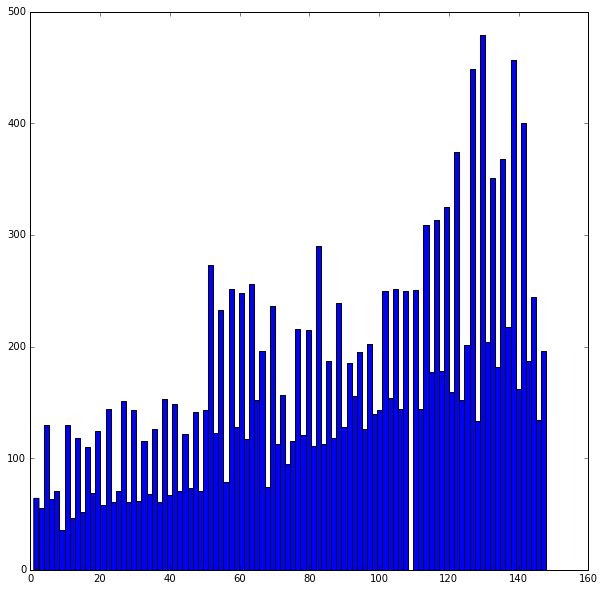

In [17]:
plt.figure(figsize=(10,10))
plt.hist(df_usa.month.values, bins=100)

In [117]:
docword = pd.read_csv('usa/docword.usa.txt', sep=' ', header=None, skiprows=3)

In [118]:
docword.head()

,0,1,2
0,1,945,4
1,1,970,1
2,1,779,1
3,1,10969,1
4,1,13275,2


### Appending to vocab

In [119]:
vocab = pd.read_csv('usa/vocab.usa.txt', header=None)

In [171]:
timestamps = pd.read_csv('usa/timestamps.months.usa.txt', header=None)

In [121]:
ts_unique = timestamps.drop_duplicates()
ts_unique.reset_index(inplace=True, drop=True)

In [122]:
ts_unique_str = pd.DataFrame(ts_unique[0].apply(lambda x: str(x)+' @timestamps_class'))

In [124]:
vocab_new = vocab.append(ts_unique_str, ignore_index=True)

In [125]:
print vocab.shape
print ts_unique.shape
print vocab_new.shape

(13652, 1)
(147, 1)
(13799, 1)


In [160]:
month_to_termid = {i: 13652+i for i in xrange(ts_unique.shape[0])}

In [127]:
vocab_new.to_csv('usa_ts/vocab.usa_ts.txt', index=False, header=False)

### Appending to docword

In [147]:
docword.head()

,0,1,2
0,1,945,4
1,1,970,1
2,1,779,1
3,1,10969,1
4,1,13275,2


In [168]:
timestamps.head()

,0
0,0
1,0
2,0
3,0
4,0


In [172]:
timestamps[1] = timestamps[0] # generating term
timestamps[0] = timestamps.index + 1 # generating doc_id
timestamps[1] = timestamps[1].apply(lambda x: month_to_termid[x]+1) # generating term_id
timestamps[2] = 1 # generating count

In [173]:
timestamps.head()

,0,1,2
0,1,13653,1
1,2,13653,1
2,3,13653,1
3,4,13653,1
4,5,13653,1


In [176]:
timestamps.shape

(16708, 3)

In [177]:
docword.shape

(3253513, 3)

In [174]:
new_docword = docword.append(timestamps, ignore_index=True)

In [182]:
new_docword.tail()

,0,1,2
3270216,16704,13799,1
3270217,16705,13799,1
3270218,16706,13799,1
3270219,16707,13799,1
3270220,16708,13799,1


In [184]:
new_docword = new_docword.sort_values(by=0)

In [185]:
new_docword.to_csv('usa_ts/docword.usa_ts.txt', index=False, header=False, sep=' ')
# N = 16708
# W = 13652+147=13799
# NNZ = 6641852+147=6641999

In [178]:
6641852+147

6641999